# KNN in Python

In [23]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing

In [24]:
os.chdir("C:\\Users\\Matt\\Documents\\Python_Projects")

baseball_train = pd.read_csv(r"baseball_train.csv",index_col=0,
 dtype={'Opp': 'category', 'Result': 'category',
'Name': 'category'}, header=0)
baseball_test = pd.read_csv(r"baseball_test.csv",index_col=0,
 dtype={'Opp': 'category', 'Result': 'category', 'Name': 'category'}, header=0)

In [25]:
X = baseball_train.iloc[:,:-1]
X = X[['H','R','ERA','BB','SO','GB','FB','LD','PO','PU','Unk','SB','IBB']]
X_scaled = preprocessing.scale(X)
y = baseball_train.iloc[:,-1]

C:\Users\Matt\Documents\Spyder\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=21191)

In [27]:
# range of k we want to try
k_range = range(1, 50)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    cv_results = cross_val_score(knn,
                                 X_scaled,
                                 y,
                                 cv=rkf,
                                 scoring="roc_auc")
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(cv_results.mean())

Text(0, 0.5, 'Cross-validated ROC')

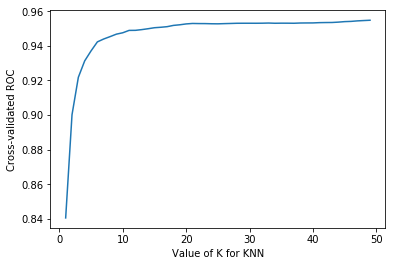

In [28]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated ROC')

In [29]:
Xnew = baseball_test.iloc[:,:-1]
Xnew = Xnew[['H','R','ERA','BB','SO','GB','FB','LD','PO','PU','Unk','SB','IBB']]
Xnew_scaled = preprocessing.scale(Xnew)
yTrue = baseball_test.iloc[:,-1]

# check classification accuracy of KNN with K=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_scaled, y)
ynew = knn.predict(Xnew_scaled)
baseball = {'predicted': ynew, 'truth': yTrue}
print(pd.DataFrame(data=baseball))
metrics.accuracy_score(yTrue, ynew)

     predicted  truth
788      Nolan  Nolan
1463     Tommy  Tommy
1272     Tommy  Tommy
639      Nolan  Nolan
41       Tommy  Nolan
391      Nolan  Nolan
779      Nolan  Nolan
1457     Tommy  Tommy
496      Nolan  Nolan
678      Nolan  Nolan
358      Nolan  Nolan
67       Tommy  Nolan
1185     Tommy  Tommy
1096     Nolan  Tommy
946      Nolan  Tommy
911      Tommy  Tommy
1542     Tommy  Tommy
324      Nolan  Nolan
955      Tommy  Tommy
206      Nolan  Nolan


C:\Users\Matt\Documents\Spyder\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


0.8